Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston 
Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset
contains information about various houses in Boston through different parameters. There 
are 506 samplesand 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])
model= np.polyfit(x, y, 1)
model

array([  0.64383562,  26.78082192])

In [3]:
predict = np.poly1d(model)
predict(65)

68.630136986301366

In [4]:
y_pred=predict(x)
y_pred

array([ 87.94520548,  81.50684932,  78.28767123,  71.84931507,  65.4109589 ])

In [5]:
r2_score(y, y_pred)

0.48032180908893263

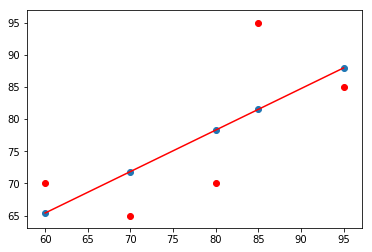

In [6]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')
plt.show()

In [7]:
boston = load_boston()

In [8]:
data = pd.DataFrame(boston.data)

In [9]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data['PRICE'] = boston.target

In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
x = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

In [14]:
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)

In [15]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [16]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [17]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

33.4507089677


In [18]:
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

19.3300193573


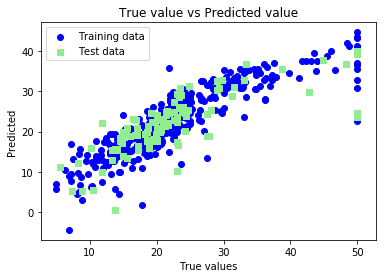

In [19]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
# plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()